# Análise exploratória de dados - The Global Hunger Index

#### Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importação dos dados

In [2]:

global_hunger_index = pd.read_csv("data/global-hunger-index.csv")
# underweight_children = pd.read_csv("data/share-of-children-underweight.csv")
# low_weight_children = pd.read_csv("data/share-of-children-with-a-weight-too-low-for-their-height-wasting.csv")
# stunting_children = pd.read_csv("data/share-of-children-younger-than-5-who-suffer-from-stunting.csv")

#### Visualização de uma amostra do nosso dataset

In [3]:
global_hunger_index.sample(5)

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
464,Vietnam,VNM,2021,13.6,NaN
361,Russia,RUS,2000,10.1,NaN
426,Togo,TGO,2012,25.3,NaN
395,Somalia,SOM,2021,50.8,NaN
179,Guinea-Bissau,GNB,2021,27.5,Value represents the mid-point of its group in...


#### Verificação dos tipos de dados do nosso dataset

In [4]:
global_hunger_index.dtypes

Entity                         object
Code                           object
Year                            int64
Global Hunger Index (2021)    float64
411773-annotations             object
dtype: object

#### Verificação do tamanho do nosso dataset. Quantas linhas e colunas ele contém

In [5]:
global_hunger_index.shape

(471, 5)

#### Quantos países estão presente nesse dataset?

In [25]:
len(pd.unique(global_hunger_index["Entity"]))

128

#### Verificando se existem valores nulos ou faltantes no dataset

In [6]:
global_hunger_index.isnull().sum()

Entity                          0
Code                            0
Year                            0
Global Hunger Index (2021)      0
411773-annotations            459
dtype: int64

#### Foi possível observar que existem muitos valores faltando na coluna "411773-annotations". Mas qual a importância e do que se trata esse campo? Vamos visualizar um exemplo, já que as anotações são sempre as mesmas

In [7]:
global_hunger_index["411773-annotations"].dropna().tolist()[0]

'Value represents the mid-point of its group in the GHI severity scale'

#### O que os registros que têm essa observação têm em comum?

In [8]:
global_hunger_index[global_hunger_index["411773-annotations"].notnull()]

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
64,Burundi,BDI,2021,42.5,Value represents the mid-point of its group in...
97,Comoros,COM,2021,42.5,Value represents the mid-point of its group in...
178,Guinea,GIN,2021,27.5,Value represents the mid-point of its group in...
179,Guinea-Bissau,GNB,2021,27.5,Value represents the mid-point of its group in...
284,Moldova,MDA,2021,5.0,Value represents the mid-point of its group in...
316,Niger,NER,2021,27.5,Value represents the mid-point of its group in...
400,South Sudan,SSD,2021,42.5,Value represents the mid-point of its group in...
411,Syria,SYR,2021,42.5,Value represents the mid-point of its group in...
412,Tajikistan,TJK,2021,15.0,Value represents the mid-point of its group in...
444,Uganda,UGA,2021,27.5,Value represents the mid-point of its group in...


#### Nesses registros, o índice global da fome representa uma média, já que só existe um registro para cada um desses países.

## Análises estatísticas

#### Entendendo a distribuição dos dados

In [9]:
global_hunger_index.groupby("Year")["Global Hunger Index (2021)"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,112.0,24.439286,15.144823,2.5,11.575,20.85,36.7,65.0
2006,115.0,21.043478,13.606514,2.5,9.000,17.50,31.4,57.9
2012,116.0,17.508621,12.092452,2.5,8.100,12.90,26.3,65.1
2021,128.0,16.790625,11.664938,2.5,7.125,14.45,24.8,50.8


#### A tabela acima apresenta algumas estatísticas sobre os nossos dados.
- count: quantos registros temos por ano
- mean: média do índice por ano
- std: desvio padrão
- min: representa o valor mínimo
- max representa o valor máximo

As colunas 25%, 50% e 70% representa os quartis, sendo que o 50% representa a mediana

#### Para facilitar a visualização vamos gerar um boxplot

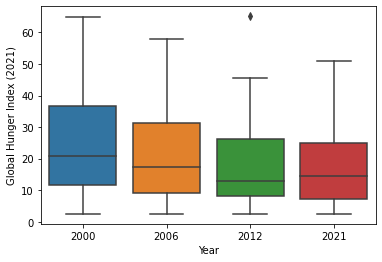

In [10]:
sns.boxplot(data=global_hunger_index, x="Year", y="Global Hunger Index (2021)");

#### Algumas considerações que podem ser feitas:
- Apesar de os valores máximos para o ano 2000 e 2012 serem praticamente idênticos, 65.0 e 65.1 respectivamente, por que o valor em 2012 é considerado um outlier e 2000 não? Uma das formas de se calcular um outlier é utilizando o intervalo interquartílico (25% e 75%). Como não temos um outlier abaixo, vamos calcular apenas o limite superior. Ele é calculado da seguinte forma: terceiro quartil + 1,2(terceiro - primeiro quartil). Sendo assim temos: 26,3 + 1,2(26,3 - 8,1) = 48,14. Sendo assim, o índice máximo sem ser considerado um outlier é aproximadamente 48.

- No ano 2000, 56 países têm índice menor ou igual a 20.85, enquanto o restando tem índice maior. Esse ano é o que tem a maior amplitude de índices.
- No ano 2006, por volta de 57 países têm índice menor ou igual a 17,50, enquanto o restante tem índice maior. 

- O ano de 2012 é o que tem a menor amplitude de índices, apesar de ter o maior índice registrado (mas como já vimos ele é um outlier). 58 países têm índice menor ou igual a 12,9.

- O ano de 2021 tem 64 países com índice menor ou igual a 14,45. Apesar de a distribuição ser parecida com o ano de 2012, ele tem mais países com um índice mais alto (sem considerar o outlier do ano 2012)

- Para escolher um número que representa melhor o índice de cada ano é aconselhável escolhermos sempre a mediana (ou o percentil 50%), já que ele desconsidera os outliers. Se nossa escolha fosse a média, o ano de 2021 demonstraria ter índices melhores do que 2012. Já quando escolhemos a mediana, vemos que 2012 se mostra o ano com os melhores índices (quanto mais baixo melhor).

- De 2000 para 2012 podemos observar uma redução drástica no índice da fome, enquanto de 2012 para 2021 podemos verificar um pequeno aumento

#### Visualizando a evolução do índice por país

In [11]:
def dados_por_pais(pais):
    print(global_hunger_index[global_hunger_index["Entity"] == pais]);
    return global_hunger_index[global_hunger_index["Entity"] == pais].plot(
        title=f"Evolução do índice da fome {pais}", x="Year", y="Global Hunger Index (2021)", xlabel="Ano", ylabel="Índice")

    Entity Code  Year  Global Hunger Index (2021) 411773-annotations
52  Brazil  BRA  2000                        11.5                NaN
53  Brazil  BRA  2006                         7.4                NaN
54  Brazil  BRA  2012                         5.5                NaN
55  Brazil  BRA  2021                         2.5                NaN


<AxesSubplot:title={'center':'Evolução do índice da fome Brazil'}, xlabel='Ano', ylabel='Índice'>

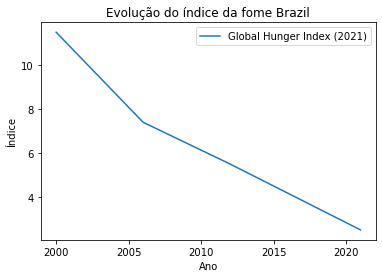

In [12]:
dados_por_pais("Brazil")

##### Comparação entre países

In [96]:
def compara_paises(pais1, pais2):
    pais1 = global_hunger_index[global_hunger_index["Entity"] == pais1]
    pais2 = global_hunger_index[global_hunger_index["Entity"] == pais2]
    comparacao = pd.concat([pais1, pais2])
    comparacao.set_index("Year", inplace=True)
    comparacao.groupby("Entity")["Global Hunger Index (2021)"].plot(legend=True,xlabel="Ano", ylabel="índice")

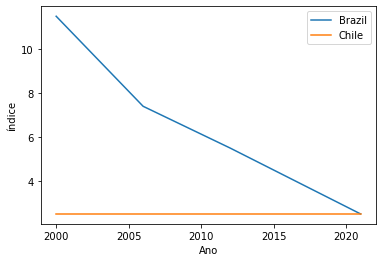

In [97]:
compara_paises("Brazil", "Chile")

#### Qual país contém o valor máximo para o índice global da fome?

In [13]:
global_hunger_index.loc[global_hunger_index["Global Hunger Index (2021)"].idxmax()]

Entity                        Somalia
Code                              SOM
Year                             2012
Global Hunger Index (2021)       65.1
411773-annotations                NaN
Name: 394, dtype: object

#### E qual  contém o índice mais baixo?

In [14]:
global_hunger_index.loc[global_hunger_index["Global Hunger Index (2021)"].idxmin()]

Entity                        Belarus
Code                              BLR
Year                             2000
Global Hunger Index (2021)        2.5
411773-annotations                NaN
Name: 32, dtype: object